# Trabajando con mínimos cuadrados


In [1]:
import numpy as np
import pandas as pd
from scipy import optimize 

## Trabajando con la encuesta

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jmbarrios/ModelacionII-20222/main/data/data_clase.csv')

In [3]:
data

,length_to_school,time_to_school,main_transport
0,3.07,25,Metrobús
1,5.35,60,Camión
2,24.25,120,Metro
3,8.20,40,Camión
4,7.54,45,Metrobús
5,28.00,75,Auto
6,4.80,40,Camión
7,22.00,120,Metro
8,6.75,30,Metro
9,7.03,100,Camión


In [7]:
?data.plot

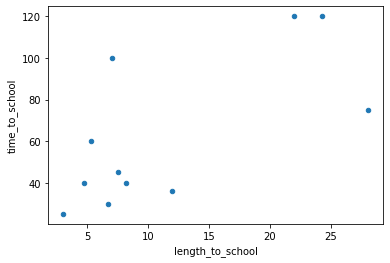

In [14]:
data.plot(x='length_to_school', y='time_to_school', kind='scatter')

### Problema
Encontrar el parámetro $\beta$ tal que 
$$
\texttt{time_to_school} = \beta * \texttt{length_to_school}.
$$

## Ajustando temperaturas

In [10]:
temp_data = pd.DataFrame({ 
    'temp_max': [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18] , 
    'temp_min': [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
    }, index = np.arange(12) + 1)

In [13]:
temp_data

,temp_max,temp_min
1,17,-62
2,19,-59
3,21,-56
4,28,-46
5,33,-32
6,38,-18
7,37,-9
8,37,-13
9,31,-25
10,23,-46


Usaremos la función `optimize.curve_fitting`

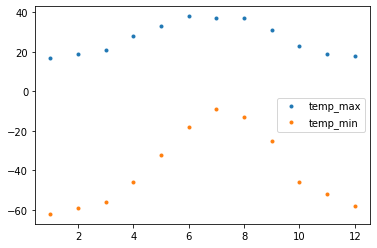

In [12]:
temp_data.plot(kind='line', style='.')

### Problema
Usar el modelo
$$
f(t, \textrm{avg}, A, \omega, b) = \textrm{avg} + A\cos(\omega t + b).
$$
Para encontrar los parámetros que ajusten mejor para el conjunto de temperaturas máximas y otros para las temperaturas mínimas.

Es importante considerar que el periodo de la función debe de ser anual, esto impone restricciones en el término $\omega t + b$ generalmente es mejor factorizar esto en la forma
$$
    \omega t + b = \frac{2\pi}{t_{\max}}(t+t_{\textrm{offset}}),
$$
donde el $t_{\max}$ se encargara de controlar el periodo y $t_{\textrm{offset}}$ ajusta los picos de la función coseno.
